In [1]:
%run 'librairies.ipynb'

In [2]:
import requests
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

In [3]:
def get_datasets(site_id):

    endpoint = 'https://stats.data.gouv.fr/'
    
    params = {
        'idSite': site_id,
        'module': 'API',
        'method': 'Actions.getPageUrls',
        'format': 'json',
        'depth': 4,
        'expanded': 1,
        'flat': 1,
        'period': 'range',
        'date': '2018-01-01,2018-12-31',
        'filter_pattern': '/fr/datasets/.+',
        'filter_limit': -1
    }
        
    r = requests.get(endpoint, params=params)
    
    # DEBUG
    print(r.url)
    # print(r.json())
    
    df = pd.DataFrame(r.json())
    
    # <CLEAN> Remove total of `fr/datasets/`
    df.sort_values(by=['nb_hits'], inplace=True, ascending=False)
    df = df.iloc[1:]
    
    return df

In [4]:
df = get_datasets(1)

https://stats.data.gouv.fr/?idSite=1&module=API&method=Actions.getPageUrls&format=json&depth=4&expanded=1&flat=1&period=range&date=2018-01-01%2C2018-12-31&filter_pattern=%2Ffr%2Fdatasets%2F.%2B&filter_limit=-1


In [5]:
df = df[ df['url'].apply(lambda x: not('oembed' in str(x)) ) ]

In [6]:
df['nb_hits'].median()

1.0

In [7]:
df['nb_hits']

1      156587
4      106583
2      103091
3       91978
5       81489
6       58141
7       46634
11      45187
8       44135
9       40696
10      38806
12      37571
13      33891
14      32825
17      31821
15      30115
18      29643
16      29365
19      26385
22      24524
21      23520
20      22128
24      20615
23      20450
25      20198
26      19832
27      19783
29      18084
28      17513
30      16437
        ...  
358         1
610         1
611         1
612         1
357         1
589         1
615         1
616         1
617         1
618         1
619         1
620         1
606         1
360         1
604         1
603         1
602         1
601         1
600         1
599         1
598         1
597         1
596         1
595         1
361         1
593         1
592         1
591         1
590         1
978         1
Name: nb_hits, Length: 914, dtype: int64

In [8]:
df['nb_hits'].quantile(np.linspace(.1, 1, 10, 1),interpolation='higher')

0.1         1
0.2         1
0.3         1
0.4         1
0.5         1
0.6         2
0.7         2
0.8         4
0.9      3981
1.0    156587
Name: nb_hits, dtype: int64

In [9]:
df['nb_hits'].quantile(np.linspace(.9, 1, 11, 1),interpolation='higher')

0.90      3981
0.91      4611
0.92      6485
0.93      7921
0.94     10164
0.95     11725
0.96     14419
0.97     18084
0.98     26385
0.99     40696
1.00    156587
Name: nb_hits, dtype: int64

In [10]:
df['nb_hits'].quantile(np.linspace(.99, 1, 11, 1),interpolation='higher')

0.990     40696
0.991     44135
0.992     45187
0.993     46634
0.994     58141
0.995     81489
0.996     91978
0.997    103091
0.998    106583
0.999    156587
1.000    156587
Name: nb_hits, dtype: int64

In [11]:
df[ df['nb_hits'] >  106583 ].count()

avg_time_generation                 1
avg_time_on_page                    1
bounce_rate                         1
entry_bounce_count                  1
entry_nb_actions                    1
entry_nb_visits                     1
entry_sum_visit_length              1
exit_nb_visits                      1
exit_rate                           1
label                               1
max_time_generation                 1
min_time_generation                 1
nb_hits                             1
nb_hits_following_search            1
nb_hits_with_time_generation        1
nb_visits                           1
segment                             1
sum_daily_entry_nb_uniq_visitors    1
sum_daily_exit_nb_uniq_visitors     1
sum_daily_nb_uniq_visitors          1
sum_time_spent                      1
url                                 1
dtype: int64

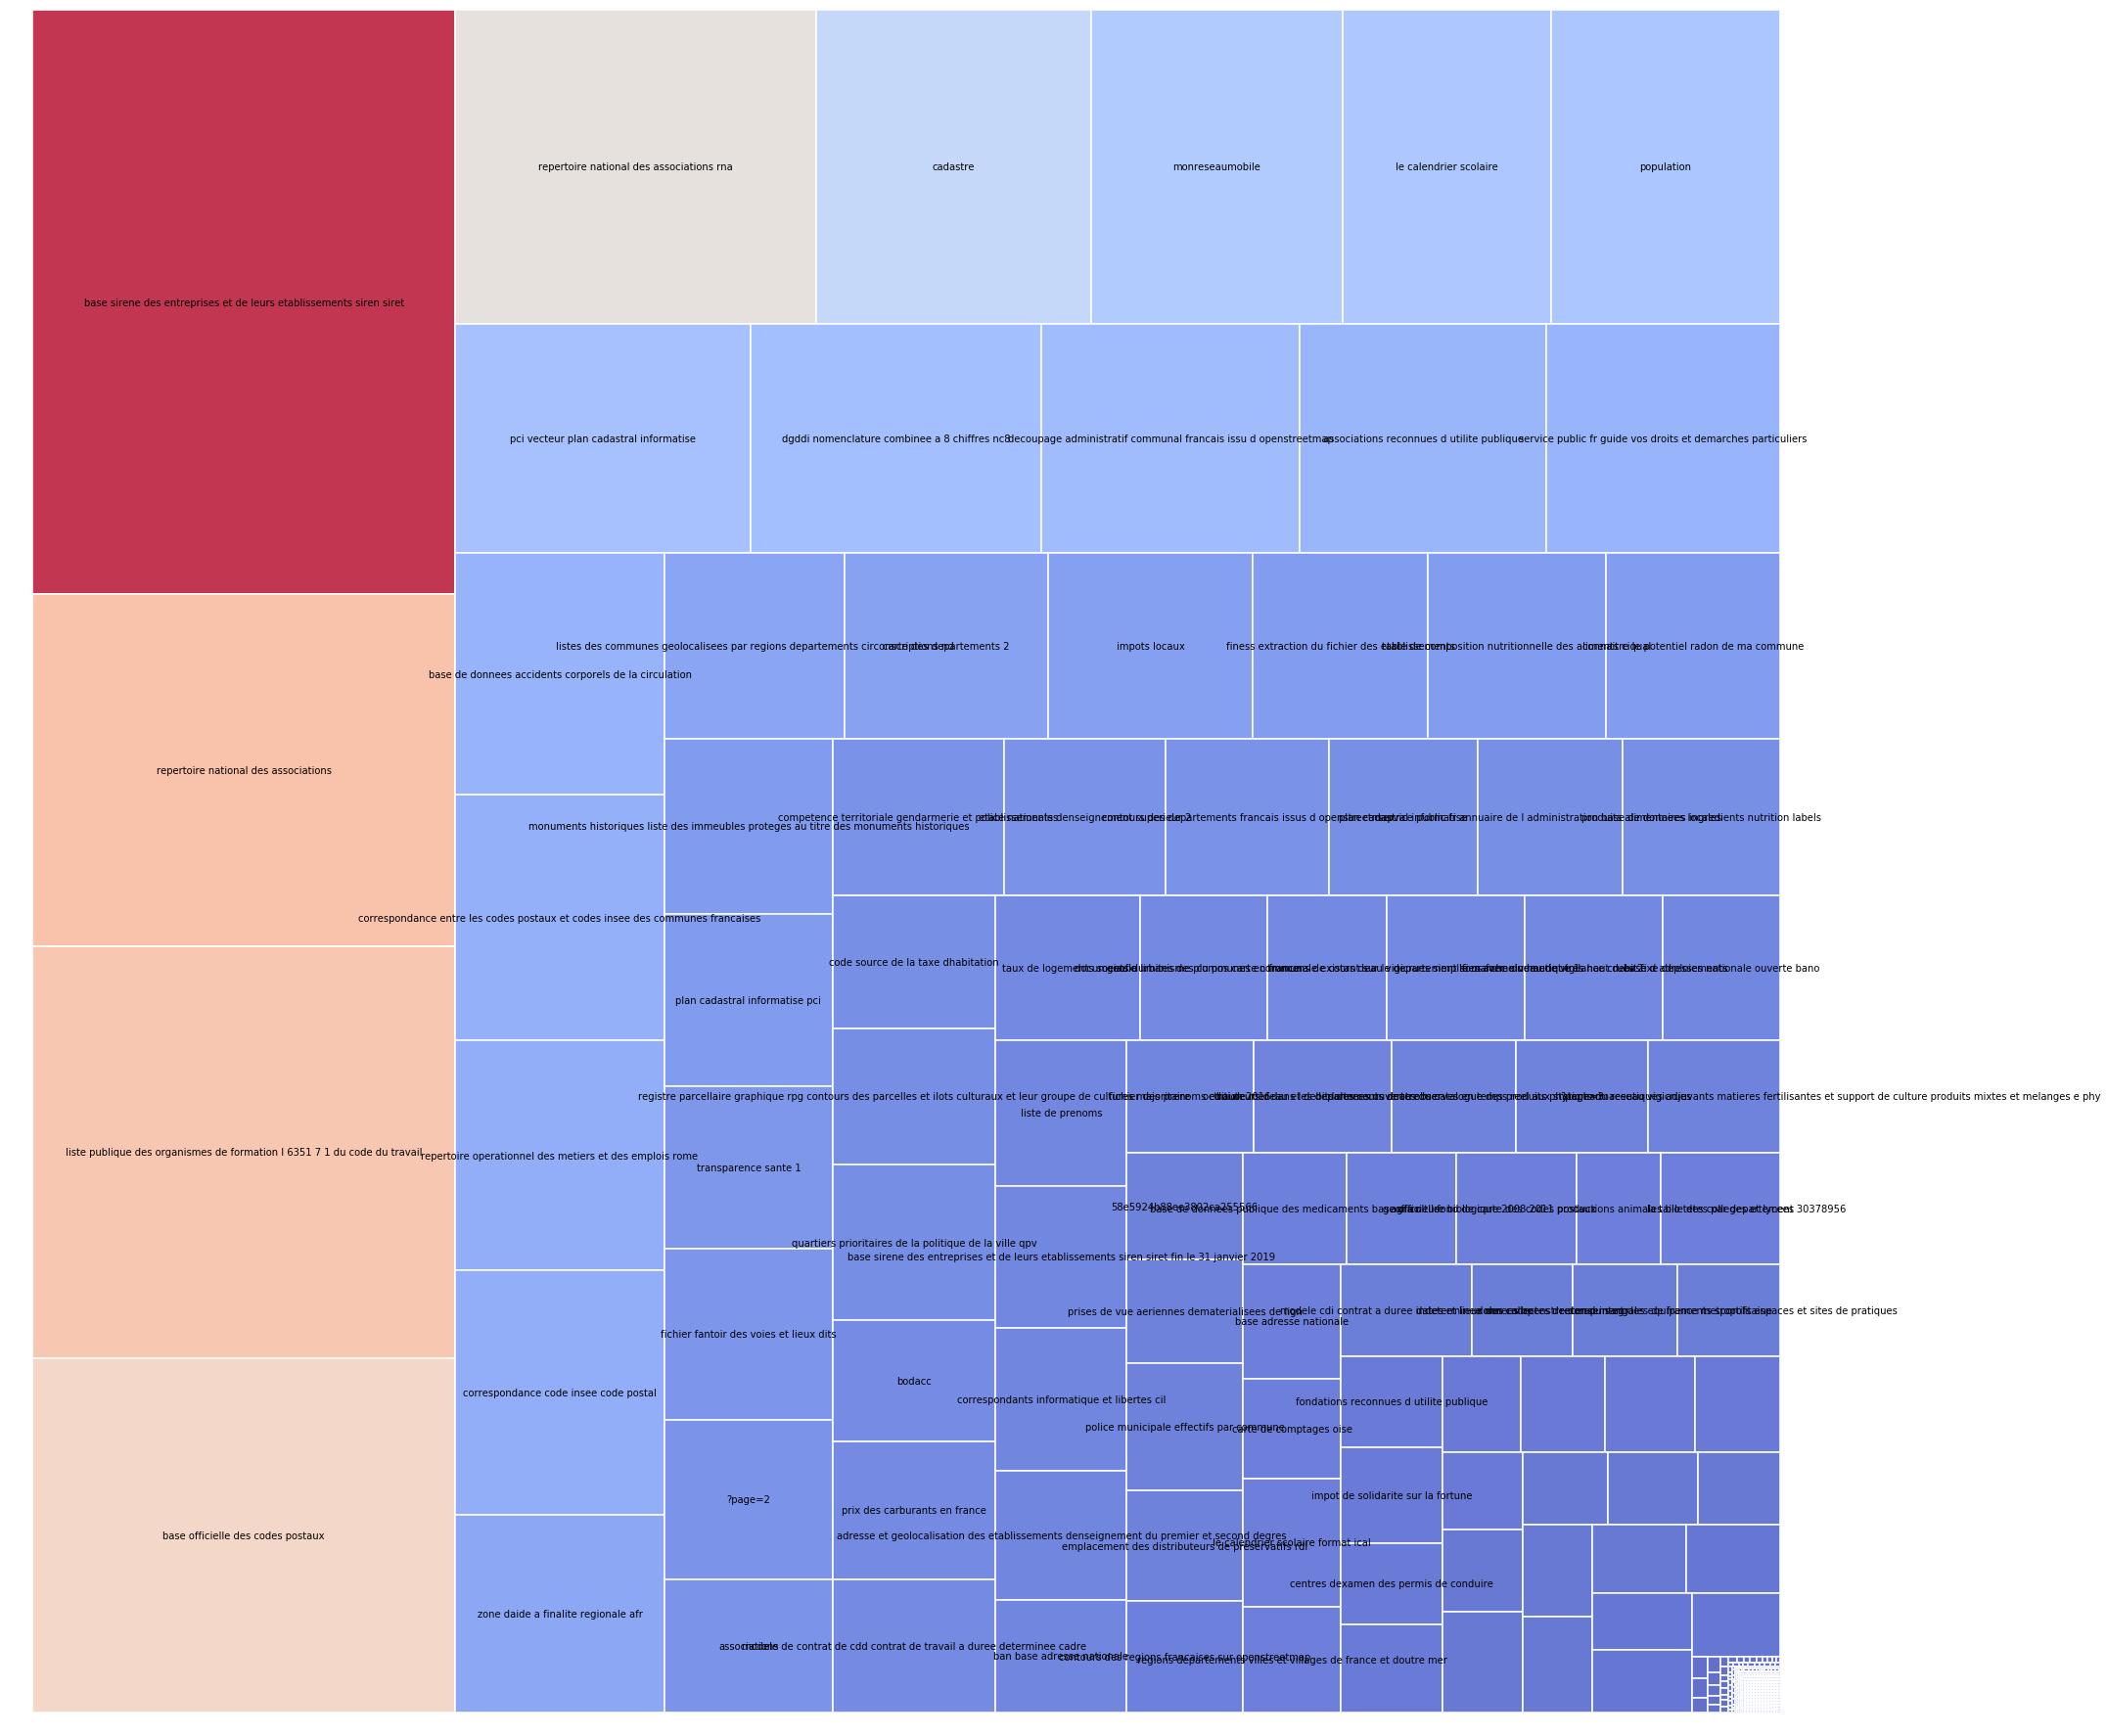

In [12]:
matplotlib.rcParams['figure.figsize'] = (32.0, 32.0)

# Get Axis and Figure
fig, ax = plt.subplots()

# Our Colormap
cmap = matplotlib.cm.coolwarm

# Min and Max Values
mini = min(df["nb_hits"])
maxi = max(df["nb_hits"])

# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df["nb_hits"]]

def label(row):
    if (row['nb_hits'] > 5000):
        
        l = row['url']
        l = l.replace('https://www.data.gouv.fr/fr/datasets/','')
        l = l.replace('http://www.data.gouv.fr/fr/datasets/','')
        l = l.replace('/','')
        l = l.replace('-',' ')
        
        return l
    else:
        return ''

# Plotting
squarify.plot(sizes=df['nb_visits'], color=colors, label=df.apply(label, axis=1), alpha=.8, linewidth=2, edgecolor="#ffffff")

# Removing Axis
plt.axis('off') 

# Invert Y-Axis
plt.gca().invert_yaxis()

# Title
#plt.title("Revenue from Star Wars Franchise Movies", fontsize=32)

# Title Positioning
# ttl = ax.title
# ttl.set_position([.5, 1.05])

# BG Color
fig.set_facecolor('#ffffff')

In [13]:
from vega import Vega

In [14]:
import seaborn as sns

In [15]:
import sklearn as sk

In [170]:
df['pctile'] = df['nb_hits'].rank(method="dense", pct=True)
df['pctile'] = df['nb_hits'].rank(pct=True)
df['pctile'] = df['nb_hits'].rank(method="min", pct=True)

def label(row):
    if (row['nb_hits'] > 5000):
        
        l = row['url']
        l = l.replace('https://www.data.gouv.fr/fr/datasets/','')
        l = l.replace('http://www.data.gouv.fr/fr/datasets/','')
        l = l.replace('/','')
        l = l.replace('-',' ')
        
        return l
    else:
        return ''

df['label'] = df.apply(label, axis=1)
    
df.to_json('temp.json', orient="records")

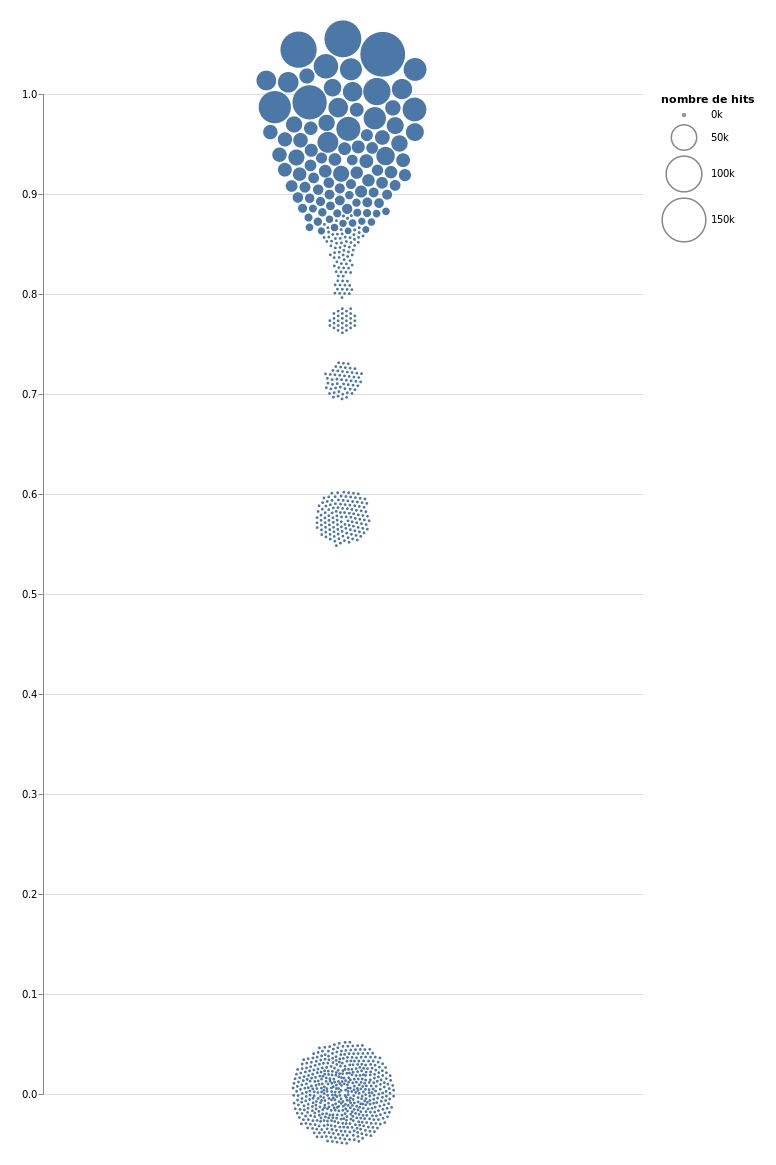

In [171]:
data = [
    {
        "name": "piwik",
        "url": "temp.json"
    }
]

scales = [
    {
        "name": "yscale",
        "domain": { "data": "piwik", "field": "pctile" },
        "nice": True,
        "range": "height"
    },
    {
        "name": "width_scale",
        "domain": { "data": "piwik", "field": "nb_hits", "type": "log" },
        "range": [8, 2000]
    }
]

marks = [
    {
        "name": "circles",
        'type' : 'symbol',
        'from': { "data": "piwik" },
        "encode": {
            "enter": {
                "xfocus": { "signal": "cx"},
                "yfocus": { "scale": "yscale", "field": "pctile"},
                "size":   { "scale": "width_scale", "field": "nb_hits"}
            }
        },
        "transform":[
            {
                "type": "force",
                "iteration": 300,
                "static": True,
                "forces": [
#                        {"force": "collide", "iterations": 1, "radius": {"expr": "scale('width_scale', datum.size)" } },
                    {"force": "collide", "iterations": 1, "radius": {"expr": "1 + sqrt(datum.size) / 2"} },
                    {"force": "y", "y": "yfocus", "strength": 2},
                    {"force": "x", "x": "xfocus", "strength": 2}
                ]
            }
        ]
    },
#         {
#             "type": "text",
#             "from": {"data": "circles"},
#             "encode": {
#                 "enter": {
#                       "align": {"value": "center"},
#                       "baseline": {"value": "middle"},
#                       "fontSize": {"value": 6},
#                       "text": {"field": "datum.label"}
#                 },
#                 "update": {
#                     "x": { "field": "x" },
#                     "y": { "field": "y" }
#                 }
#             }
#         },
]

Vega({
    "$schema": "https://vega.github.io/schema/vega/v4.json",
    "width": 600,
    "height": 1000,
    "padding": 20,
    "autosize": "pad",
    "background": "white",
    "data": data,
    "signals": [
      { "name": "cx", "update": "width/2" },
      { "name": "cy", "update": "height/2" } 
    ],
    "scales": scales,
    "axes":[
        { "orient": "left", "scale": "yscale", "grid": True}
    ],
    "legends":[
      {
          "size": "width_scale",
          "title": "nombre de hits",
          "format": "s",
          "tickCount": 4
      }  
    ],
    "marks": marks
})